In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
def simulate(trials=10, p=.5):
    x = np.random.rand(trials)
    seq_up_down=np.sign(x-p)/np.sqrt(trials)
    return np.cumsum(seq_up_down)

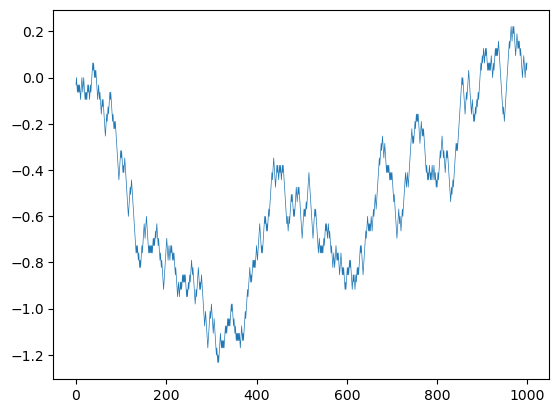

In [66]:
plt.plot(simulate(trials=1000, p=.5),  lw='.5')
plt.show()

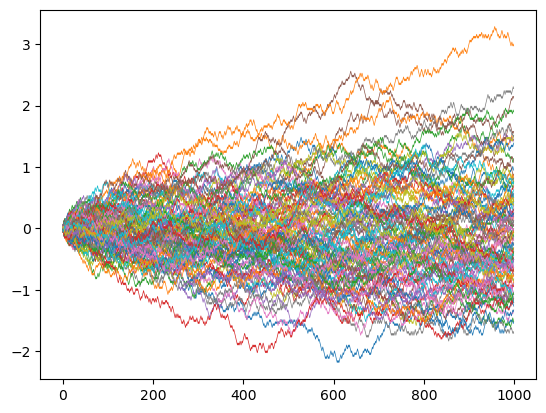

In [39]:
for i in range(100):
    plt.plot(simulate(trials=1000, p=.5),  lw='.5')

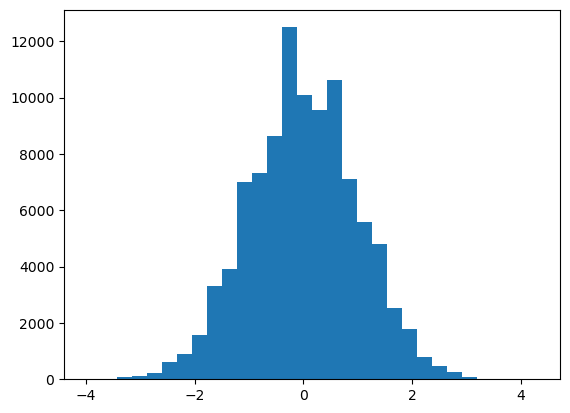

In [46]:
N = 100000
X = np.zeros(N)
for i in range(N):
    price = simulate(trials=1000, p=.5)
    #plt.plot(price,  lw='.5')
    X[i]=price[-1]
    

plt.figure()
plt.hist(X, 30)
plt.show()


Theoretical distribution

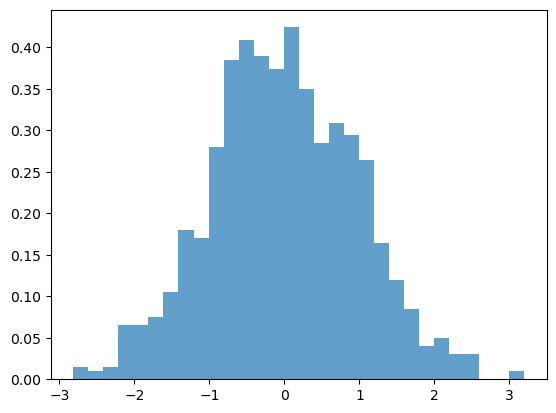

In [53]:

# Generate data for the normal distribution
mu = 0  # Mean
sigma = 1  # Standard deviation
data = np.random.normal(mu, sigma, 1000)

# Plot the histogram
plt.hist(data, bins=30, density=True, alpha=0.7)
plt.show()


## Theoretical equation of the normal distribution 
$$
f(x) =  \frac{1}{{\sigma \sqrt{2\pi}}} \exp^{-\frac{1}{2}\left(\frac{{x - \mu}}{{\sigma}}\right)^2}
$$


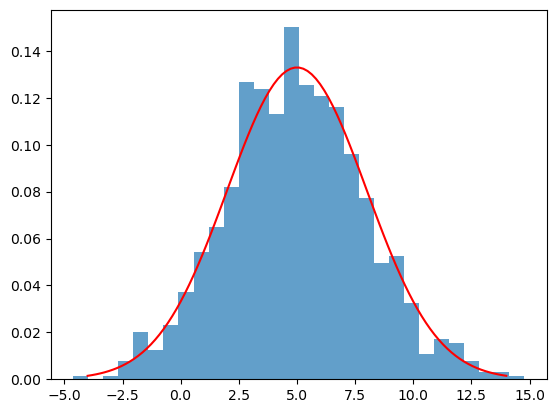

In [54]:
# Generate data for the normal distribution
mu = 5 
sigma = 3
data = np.random.normal(mu, sigma, 1000)
plt.hist(data, bins=30, density=True, alpha=0.7)

# Plot the probability density function (PDF)
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
plt.plot(x, pdf, color='red')

plt.show()


## Activity
Suppose a normal distribution (mean=0.15, std=.2). What percentage of values is lower than 0? 
In other words, what is the probability that I lose money if I invest in a fund with 15% growth and 20% volatility?

**Empirically**


In [55]:
N=10000000
simulation =  np.random.normal(.15, .2, N)



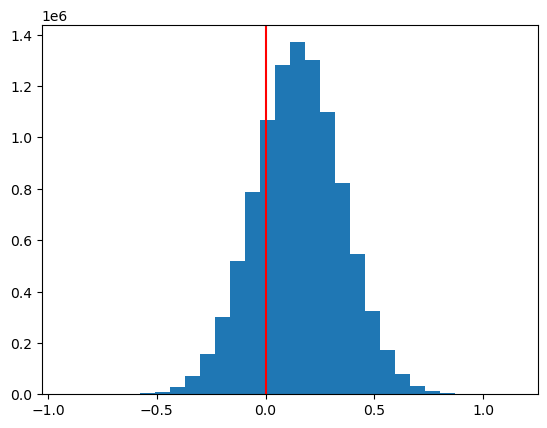

In [56]:
plt.hist(simulation, 30)
plt.axvline(0, color='red')
plt.show()

In [58]:
neg = 0
for i in range(N):
    if simulation[i]<0:
        neg = neg+1

prob_loss = neg/N
print(prob_loss)

0.2265798


In [64]:
#vectorization
prob_loss2=sum(1*(simulation<0))/N
print(prob_loss2)

0.2265798


Exact result

In [65]:
from scipy import stats
stats.norm.cdf(0, loc=.15, scale=.2)

0.22662735237686826